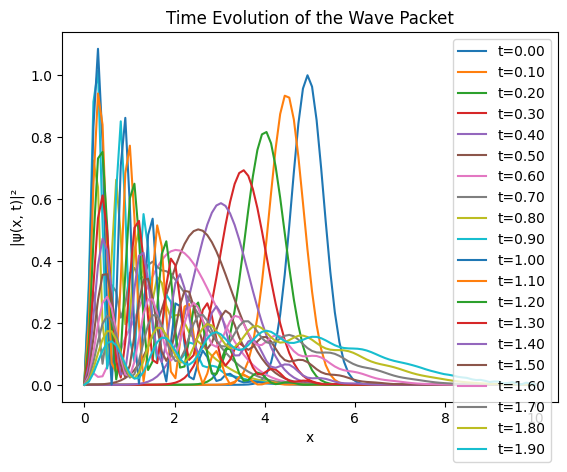

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0  # Planck's constant (reduced)
m = 1.0     # Particle mass
L = 10.0    # Length of the domain
N = 100     # Number of spatial points
T = 2.0     # Total time
dt = 0.01   # Time step

# Discretization
dx = L / (N - 1)
x = np.linspace(0, L, N)
time_steps = int(T / dt)

# Initial wave function (Gaussian wave packet)
x0 = L / 2
sigma = 0.5
k0 = 5.0
psi0 = np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)) * np.exp(1j * k0 * x)
psi = psi0.copy()

# Potential (free particle in this case)
V = np.zeros(N)

# Hamiltonian matrix using finite difference method
H = np.zeros((N, N), dtype=np.complex128)
for i in range(1, N - 1):
    H[i, i] = -2.0
    H[i, i - 1] = 1.0
    H[i, i + 1] = 1.0
H *= -hbar ** 2 / (2 * m * dx ** 2)
H += np.diag(V)

# Time evolution operator (Crank-Nicolson method)
I = np.eye(N, dtype=np.complex128)
A = I - 1j * dt / (2 * hbar) * H
B = I + 1j * dt / (2 * hbar) * H
A_inv = np.linalg.inv(A)

# Time evolution
for t in range(time_steps):
    psi = A_inv @ B @ psi

    # Plot wave function
    if t % 10 == 0:
        plt.plot(x, np.abs(psi) ** 2, label=f't={t * dt:.2f}')
        plt.xlabel('x')
        plt.ylabel('|ψ(x, t)|²')
        plt.title('Time Evolution of the Wave Packet')
        plt.legend()

plt.show()


Explanation:
Constants and Parameters:

hbar is the reduced Planck's constant.
m is the particle mass.
L is the length of the spatial domain.
N is the number of spatial points.
T is the total simulation time.
dt is the time step size.
Discretization:

dx is the spatial step size.
x is the array of spatial points.
time_steps is the number of time steps.
Initial Wave Function:

A Gaussian wave packet centered at x0 with width sigma and initial momentum k0.
Potential:

In this case, it's a free particle, so the potential V is zero everywhere.
Hamiltonian Matrix:

Constructed using the finite difference method.
Time Evolution Operator:

Using the Crank-Nicolson method for stable time evolution.
Time Evolution:

The wave function psi is updated at each time step using the Crank-Nicolson method.
The wave function is plotted every 10 time steps.
This script will produce a plot showing the time evolution of the wave packet. You can modify the initial conditions, potential, and parameters to explore different scenarios.






